<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/load_SDKP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Install Package yang Dibutuhkan**

In [1]:
pip install sastrawi

     |████████████████████████████████| 209 kB 7.2 MB/s 


In [2]:
pip install swifter

     |████████████████████████████████| 296 kB 8.5 MB/s 
     |████████████████████████████████| 125 kB 62.1 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


**#Load Library**

In [3]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**Preprocessing**

In [6]:
def ubah_text_lower(text):
    return text.lower()
    
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop_words_corpus = list(stopwords.words('indonesian'))
stop_from_list = stop['stopwords'].to_list()
def hapus_stopwords(post):
  filtered_words = [w for w in post if w not in stop_words_corpus]
  filtered_words = [w for w in filtered_words if w not in stop_from_list]
  return filtered_words

def preprocess_filtered(post):
    #Remove 'b
    posted = re.sub(r"b'", ' ', post)
    # Remove urls dan trash
    posted = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", ' ', posted, flags=re.MULTILINE)
    # Remove user @ references and '#' from post
    posted = re.sub(r'\@\w+|\#|\d+', ' ', post)
    return posted

def tokenkan(text):
    return word_tokenize(text)

normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def hapus_punct_2(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

def hapus_punct(text):
    PUNCT_TO_REMOVE = string.punctuation
    punct = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return punct

#Import Libraries

In [7]:
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing

In [8]:
df = pd.read_csv('drive/MyDrive/data_psyco/Text_Preprocessing_Depres_Suicide_990_Terbaru_Fix_3.csv').astype(str)
df.columns = ['Label', 'Post']
df.head()

,Label,Post
0,1,depresi cemas rayap
1,1,depresi buru
2,1,depresi terusmenerus
3,1,kali bicara depresi psikologi mata samping jal...
4,1,depresi lelucon marah


0    826
1    824
Name: Label, dtype: int64


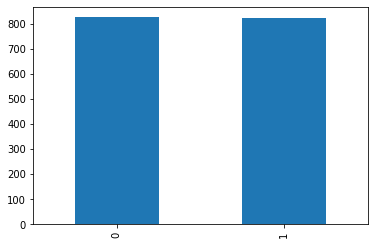

In [9]:
#check the distribution of lebels
labels = df['Label']
labels_count = labels.value_counts()
labels_count.plot(kind="bar")
print(labels.value_counts())

In [10]:
post = []
for i in df['Post']:
    post.append(i.split())
print(post[:2])

[['depresi', 'cemas', 'rayap'], ['depresi', 'buru']]


In [12]:
word2vec_model = Word2Vec(post, size=500, window=3, min_count=1, workers=15)
print(word2vec_model)

Word2Vec(vocab=2772, size=500, alpha=0.025)


In [13]:
token = Tokenizer(2772)
token.fit_on_texts(df['Post'])
text = token.texts_to_sequences(df['Post'])
text = pad_sequences(text, 100)
print(text[:2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   7 342]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1 477]]


In [14]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Label'])
y = to_categorical(y)
y[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [16]:
def creat_model():
  keras_model = Sequential()
  keras_model.add(word2vec_model.wv.get_keras_embedding(True))
  keras_model.add(Dropout(0.2))
  keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
  keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
  keras_model.add(MaxPool1D())
  keras_model.add(Dropout(0.2))
  keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
  keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
  keras_model.add(MaxPool1D())
  keras_model.add(Dropout(0.2))
  keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
  keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
  keras_model.add(GlobalMaxPool1D())
  keras_model.add(Dropout(0.2))
  keras_model.add(Dense(200))
  keras_model.add(Activation('relu'))
  keras_model.add(Dropout(0.2))
  keras_model.add(Dense(2))
  keras_model.add(Activation('sigmoid'))
  keras_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
  return keras_model

In [ ]:
#history = keras_model.fit(x_train, y_train, batch_size=16, epochs=3, validation_data=(x_test, y_test))

In [17]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model("drive/MyDrive/data_psyco/otw_sidang_sigmoid/98_depresi_1000_and_suicide_cnn_16b_4e_v2_laporan.h5")

In [18]:
#analyze the results
score, acc = model.evaluate(x_test, y_test, verbose = 2, batch_size=16)
y_pred = model.predict(x_test)
#print(y_pred)

21/21 - 1s - loss: 0.1442 - acc: 0.9576


In [ ]:
#Other accuracy metrices
#y_pred = (y_pred > 0.5)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       165
           1       0.96      0.95      0.96       165

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



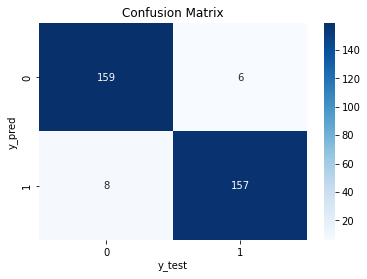

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

#F1 Score, Recall and Precision
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
#model.save('drive/MyDrive/data_psyco/otw_sidang_sigmoid/98_depresi_1000_and_suicide_cnn_8.h5')

# Import Libraries

In [20]:
def text_preprocessing(text):
  df['text_lower'] = text.apply(ubah_text_lower)
  df['filtered'] = df['text_lower'].apply(preprocess_filtered)
  df['token'] = df['filtered'].apply(tokenkan)
  df['normalized'] = df['token'].apply(normalized_term)
  df['normalized'] = df['normalized'].apply(hapus_stopwords)

  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # stemmed
  def stemmed_wrapper(term):
      return stemmer.stem(term)

  term_dict = {}

  for document in df['normalized']:
      for term in document:
          if term not in term_dict:
              term_dict[term] = ' '
              
  #print(len(term_dict))
  print("------------------------")

  for term in term_dict:
      term_dict[term] = stemmed_wrapper(term)
      print(term,":" ,term_dict[term])
      
  #print(term_dict)
  print("------------------------")


  # apply stemmed term to dataframe
  def stemmed_term(document):
      return [term_dict[term] for term in document]

  df['stemmed'] = df['normalized'].swifter.apply(stemmed_term)
  #print(df['stemmed'])

  df['stemmed'] = df['stemmed'].astype(str)
  df['stemmed'] = df['stemmed'].apply(hapus_punct_2)

In [21]:
Xo = 'Bersama mu hal terindah di dalam kehidupan'
Yo = 'lelah dengan hidup ini. Nak mati aku dah penat #depresi'
datax = {'Postingan':[Xo]}
df = pd.DataFrame(datax)
text_preprocessing(df['Postingan'])
df.head()

------------------------
mu : mu
terindah : indah
kehidupan : hidup
------------------------


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Postingan,text_lower,filtered,token,normalized,stemmed
0,Bersama mu hal terindah di dalam kehidupan,bersama mu hal terindah di dalam kehidupan,bersama mu hal terindah di dalam kehidupan,"[bersama, mu, hal, terindah, di, dalam, kehidu...","[mu, terindah, kehidupan]",mu indah hidup


In [22]:
X_sample = token.texts_to_sequences(df['stemmed'])
print(X_sample)
X_sample = pad_sequences(X_sample, 75)
print(X_sample)
y_sample = model.predict(X_sample)
print(y_sample)
hasil = np.argmax(y_sample)

print(hasil)
if (hasil == 0) :
  print('tidak mengidap gangguan psikologis')
else:
  print('mengidap gangguan psikologis')

[[133, 183, 4]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  133 183   4]]
[[0.9715935  0.02753934]]
0
tidak mengidap gangguan psikologis
